In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import os

We can either organise our data by putting it in our working directory, or if we have a lot of files we can put them in their own directory on our disk.


In [28]:

data_path = os.path.join("data", "google_trends_original.csv")
#print(data_path)

flu_df = pd.read_csv(data_path, 
                     skiprows=3, 
                     names=['week','flu','flu_jab','flu_symptoms'],
                     parse_dates=['week'])


flu_df.replace('<1','0').convert_dtypes().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   week          261 non-null    datetime64[ns]
 1   flu           261 non-null    Int64         
 2   flu_jab       261 non-null    string        
 3   flu_symptoms  261 non-null    string        
dtypes: Int64(1), datetime64[ns](1), string(2)
memory usage: 8.5 KB


In [20]:
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   week          261 non-null    datetime64[ns]
 1   flu           261 non-null    int64         
 2   flu_jab       132 non-null    float64       
 3   flu_symptoms  250 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 8.3 KB


In [31]:
flu_df = flu_df.replace('<1','1')

flu_df.flu = pd.to_numeric(flu_df.flu)
flu_df.flu_jab = pd.to_numeric(flu_df.flu_jab)
flu_df.flu_symptoms = pd.to_numeric(flu_df.flu_symptoms)

flu_df.week = pd.to_datetime(flu_df.week)
flu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   week          261 non-null    datetime64[ns]
 1   flu           261 non-null    int64         
 2   flu_jab       261 non-null    int64         
 3   flu_symptoms  261 non-null    int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 8.3 KB


Text(0, 0.5, 'Search volume')

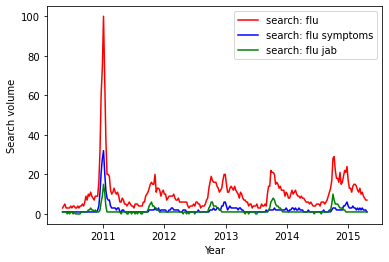

In [32]:
fig = plt.figure()
ax = fig.add_subplot()

ax.plot(flu_df.week, flu_df.flu, 'r', label="search: flu")
ax.plot(flu_df.week, flu_df.flu_symptoms, 'b',label="search: flu symptoms")
ax.plot(flu_df.week, flu_df.flu_jab, 'g',label="search: flu jab")

ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Search volume")

In [130]:
flu_df.week.dt.isocalendar().week

0      17
1      18
2      19
3      20
4      21
       ..
256    13
257    14
258    15
259    16
260    17
Name: week, Length: 261, dtype: UInt32

In [121]:
data_path = os.path.join("data", "who_flunet_uk_original.csv")
#print(data_path)

# if "whodata.csv" is in the same directory use
# who_df = pd.read_csv("whodata.csv")


#who_df.columns.to_list()

colnames = [ 'a_h5_label', 'year', 'week_number', 'a_h5',
          'a_h1_label', 'a_h1',
          'a_h1n1_label', 'a_h1n1',
           'a_h3_label', 'a_h3',
          'a_notsubtyped_label', 'a_notsubtyped',
          'b_yamagata_label', 'b_yamagata',
          'b_victoria_label', 'b_victoria',
          'b_notdetermined_label', 'b_notdetermined' ]

who_df = pd.read_csv(data_path, skiprows=4, names= colnames) 

date_vals = []

for i in range(len(who_df)):
    year = who_df.year[i]
    week_num = who_df.week_number[i]
    entry_date = pd.Timestamp.fromisocalendar(year,week_num,1)
    date_vals.append(entry_date)

    
row_selection = who_df['date']
who_df.loc[  ]
    
who_df['date']=date_vals   



who_df = who_df.loc[:,['date',
                      'a_h5','a_h1','a_h3', 'a_h1n1','a_notsubtyped',
                      'b_yamagata', 'b_victoria', 'b_notdetermined' ]]
who_df

,date,a_h5,a_h1,a_h3,a_h1n1,a_notsubtyped,b_yamagata,b_victoria,b_notdetermined
0,1995-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1398,2021-10-18,NaN,0.0,1.0,2.0,7.0,0.0,0.0,12.0
1399,2021-10-25,NaN,0.0,3.0,2.0,7.0,0.0,0.0,14.0
1400,2021-11-01,NaN,0.0,5.0,3.0,5.0,0.0,0.0,18.0
1401,2021-11-08,NaN,0.0,4.0,0.0,6.0,0.0,0.0,19.0


In [101]:
who_df

,year,week_number,a_h5,a_h1,a_h3,a_h1n1,a_notsubtyped,b_yamagata,b_victoria,b_notdetermined
0,1995,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1995,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1995,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1995,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1995,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1398,2021,42,NaN,0.0,1.0,2.0,7.0,0.0,0.0,12.0
1399,2021,43,NaN,0.0,3.0,2.0,7.0,0.0,0.0,14.0
1400,2021,44,NaN,0.0,5.0,3.0,5.0,0.0,0.0,18.0
1401,2021,45,NaN,0.0,4.0,0.0,6.0,0.0,0.0,19.0


In [120]:
date_vals = []

for i in range(len(who_df)):
    year = who_df.year[i]
    week_num = who_df.week_number[i]
    entry_date = pd.Timestamp.fromisocalendar(year,week_num,1)
    date_vals.append(entry_date)
    
who_df['date']=date_vals   
who_df = who_df.reindex(columns=['date'])
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1403 entries, 0 to 1402
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1403 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 11.1 KB


In [103]:
pd.Timestamp.now()

Timestamp('2021-11-23 21:14:56.038639')

In [110]:
idx_week_num = who_df.columns.get_loc('week_number')
who_df.iloc[100,idx_week_num]

In [112]:
idx_week_num = who_df.columns.get_loc('week_number')
who_df.iloc[100,idx_week_num]

49